## 11주차 과제_0512(월)

딥러닝 파이토치 교과서 ch4 p.138~163

# 4.1 인공 신경망의 한계와 딥러닝 출현

퍼셉트론 : 다수의 신호(흐름이 있는)를 입력으로 받아 하나의 신호를 출력하는데 이 신호를 입력 받아 '흐른다/안 흐른다(1 또는 0)'는 정보를 앞으로 전달하는 원리로 작동

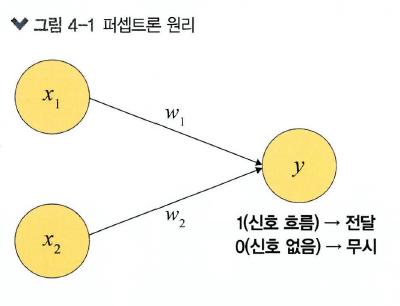

**AND 게이트**

모든 입력이 '1'일때 작동

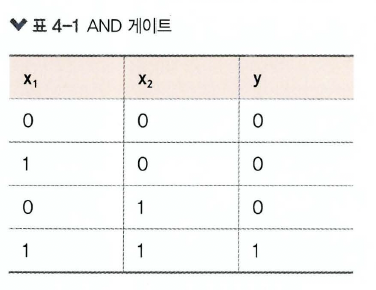

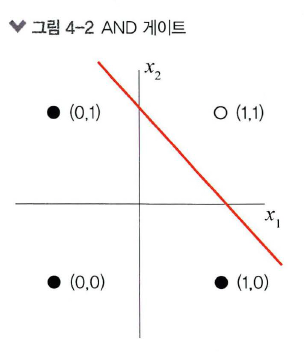

**OR 게이트**

입력에서 둘 중 하나만 '1'이거나 둘 다 '1'일 때 작동

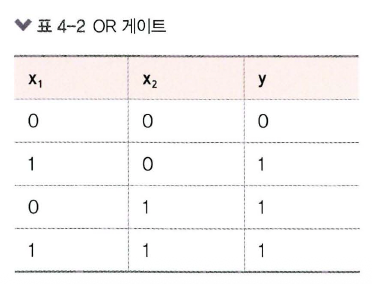

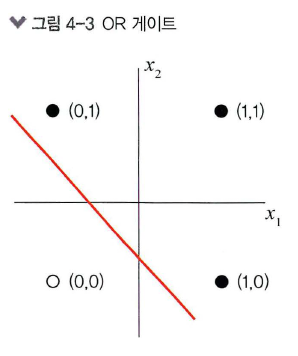

**XOR 게이트**

베타적 논리합이라는 용어로 입력 두 개 중 한 개만 '1'일 때 작동하는 논리 연산

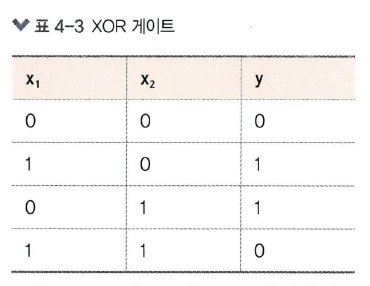

데이터가 비선형적으로 분리되기 때문에 제대로 된 분류가 어려움

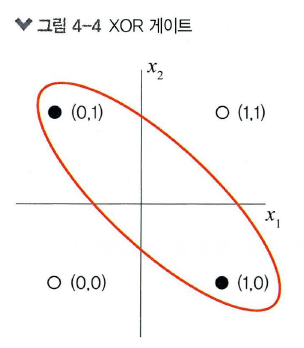

단층 퍼셉트론에서는 AND, OR 연산에 대해 학습 가능하지만 XOR에 대해서는 학습이 불가능함

$\hookrightarrow$ 입력층과 출력층 사이에 하나 이상의 중간층(은닉층)을 두어 비선형적으로 분리되는 데이터에 대해서도 학습이 가능하도록 하는 **다층 퍼셉트론** 고안

이때 입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망을 **심층 신경망(DNN), 딥러닝**이라고 함

# 4.2 딥러닝 구조

## 4.2.1 딥러닝 용어

입력층, 출력층, 두 개 이상의 은닉층으로 구성

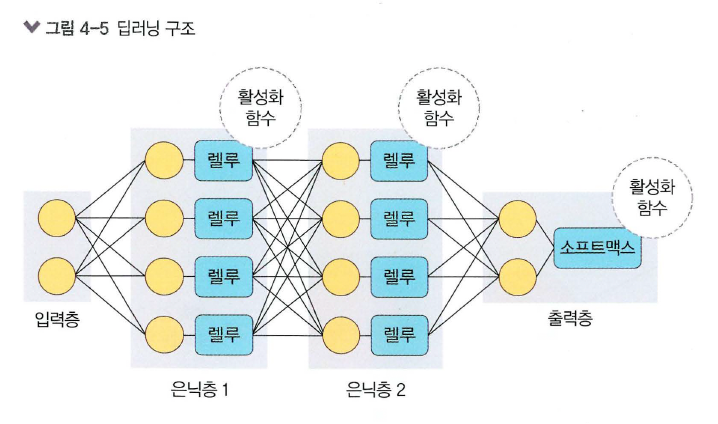

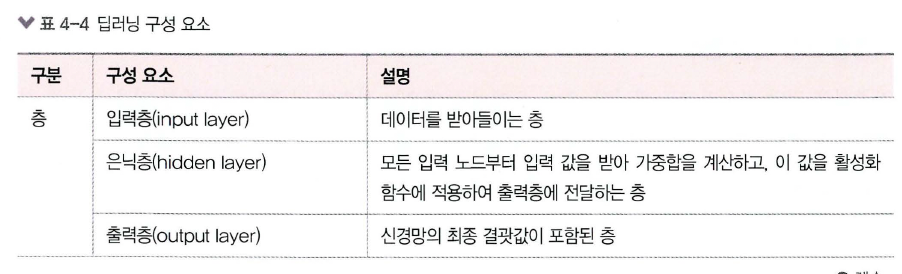
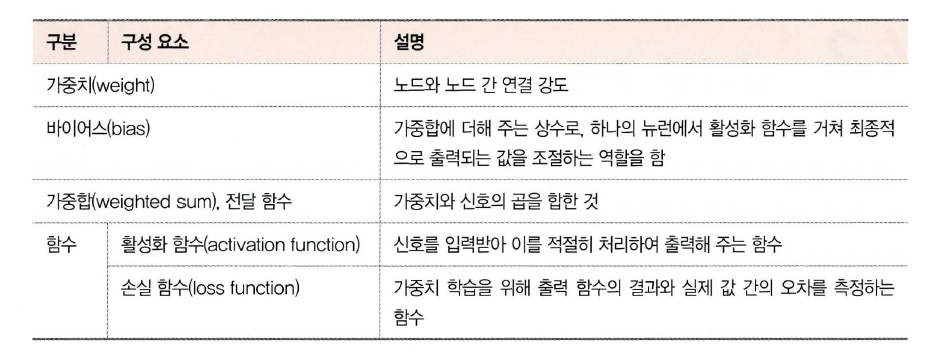

**가중치**

입력 값이 연산 결과에 미치는 영향력을 조절하는 요소

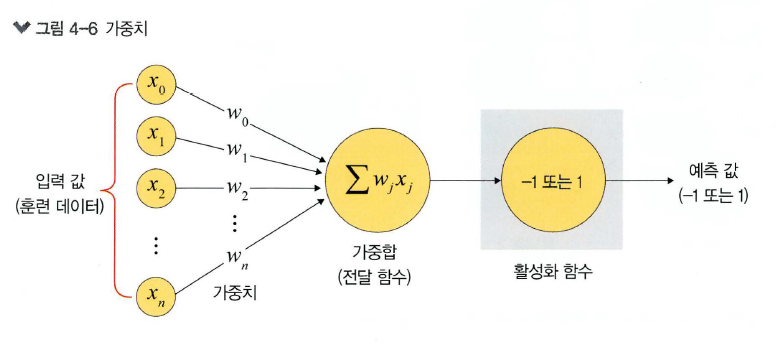

**가중합 또는 전달 함수**

각 노드에 들어오는 신호에 가중치를 곱해서 다음 노드로 전달 되는데 이 값들을 모두 더한 합계

노드의 가중합이 계산되면 이 가중합을 활성화 함수로 보내기 때문에 전달 함수라고도 함

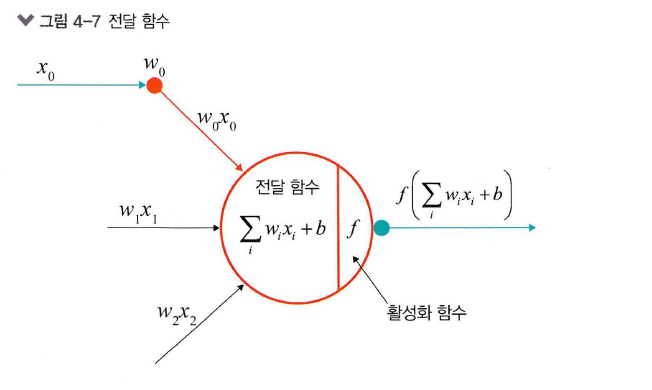

$$\displaystyle\sum_iw_ix_i + b$$

**활성화 함수**

전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수

- 시그모이드 함수

    선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형해 줌

    주로 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는데 사용

    기울기 소멸 문제가 발생하여 딥러닝 모델에서는 잘 사용하지 않음

$$f(x) = \frac{1}{1+e^{-x}}$$

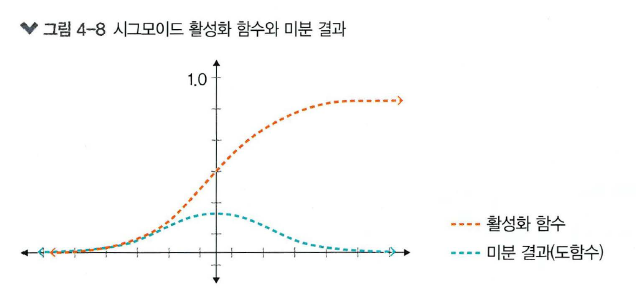

- 하이퍼볼릭 탄젠트 함수

    선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형해 줌

    시그모이드에서 결괏값 평균이 0이 아닌 양수로 편향되는 문제를 해결했지만 기울기 소멸 문제는 여전히 발생함

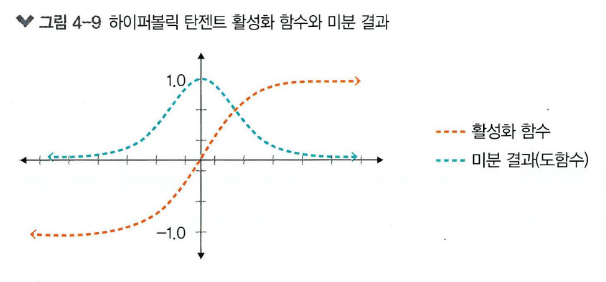

- 렐루 함수

    입력(x)이 음수일 때는 0을 출력하고 양수일 때는 x를 출력함

    경사 하강법에 영향을 주지 않아 학습 속도가 빠르고 기울기 소멸 문제가 발생하지 않는 장점

    일반적으로 은닉충에서 사용되며 하이퍼볼릭 탄젠트 함수 대비 학습 속도가 6배 빠름

    음수 값을 입력 받으면 항상 0을 출력하기 때문에 학습 능력이 감소하는 문제점이 있음 $\rightarrow$ 리키 렐루 함수 사용

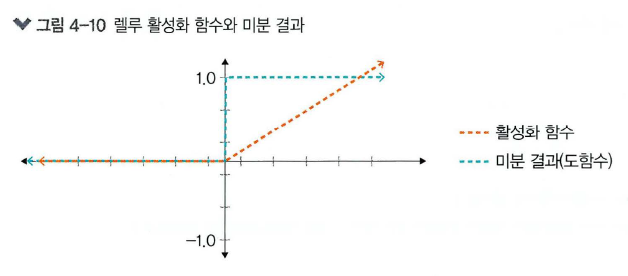

- 리키 렐루 함수

    입력 값이 음수이면 0이 아닌 0.001처럼 매우 작은 수를 반환

    입력 값이 수렴하는 구간이 제거되어 렐루 함수를 사용할 때 생기는 문제 해결 가능

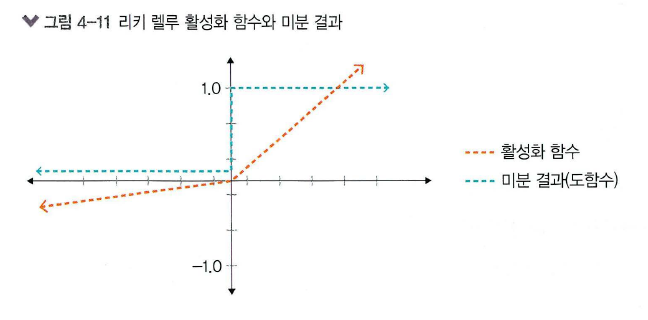

- 소프트맥스 함수

    입력 값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함

    보통 딥러닝에서 출력 노드의 활성화 함수로 많이 사용됨

$$
\begin{align}
y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^nexp(a_i)} \\
n : 출력층의\ 뉴런\ 개수 \\
y_k : k번째\ 출력
\end{align}$$



In [2]:
import torch

In [3]:
# 렐루 함수와 소프트맥스 함수 구현
class Net(torch.nn.Module) :
    def __init__(self, n_features, n_hidden, n_output) :
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
        self.relu = torch.nn.ReLu(inplace = True)
        self.out = torch.nn.Linear(n_hidden, n_output) # 출력층
        self.softmax = torch.nn.Softmax(dim = n_output)
    def forward(self, x) :
        x = self.hidden(x)
        x = self.relu(x) # 은닉층을 위한 렐루 활성화 함수
        x = self.out(x)
        x = self.softmax(x) # 출력층을 위한 소프트맥스 활성화 함수
        return x

**손실 함수**

경사 하강법은 학습률($\eta$, learning rate)과 손실 함수의 순간 기울기를 이용하여 가중치를 업데이트하는 방법임

즉, 손실 함수는 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이 나는지 평가하는 지표임

값이 클수록 많이 틀렸다는 의미이고 이 값이 0에 가까우면 완벽하게 추정할 수 있다는 의미

- 평균 제곱 오차

    실제 값과 예측 값의 차이를 제곱하여 평균낸 것

    실제 값과 예측 값의 차이가 클수록 평균 제곱 오차의 값도 커짐 $\rightarrow$ 값이 작을수록 예측력이 좋다

    회귀에서 손실 함수로 주로 사용됨

$$
\begin{align}
MSE = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_i - \hat y_i)^2 \\
\hat y_i : 신경망의\ 출력(신경망이 추정한 값)\\
y_i : 정답\ 레이블 \\
i : 데이터의\ 차원\ 개수
\end{align}$$



```
import torch

loss_fn = torch.nn.MSELoss(reduction = 'sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
```




**크로스 엔트로피 오차**

분류 문제에서 원-핫 인코딩했을 때 사용할 수 있는 오차 계산법

평균 제곱 오차 손실 함수와 시그모이드 활성화 함수를 결합하여 사용하면 시그모이드의 특성으로 기울기가 매끄럽지 못한 울퉁불퉁한 상태이며 학습 속도도 매우 늦음

$\hookrightarrow$ 이러한 단점을 극복한 것이 크로스 엔트로피 오차

크로스 인트로피 오차는 두 개의 확률 분포 차이를 이용하기 때문에 시그모이드의 영향을 덜 받음 $\rightarrow$ 평균 제곱 오차보다 학습 속도가 빠름

$$
\begin{align}
CrossEntropy=\displaystyle\sum
_{i=1}^n y_ilog \hat y_i \\
\hat y_i : 신경망의\ 출력(신경망이\ 추정한\ 값) \\
y_i : 정답\ 레이블 \\
i : 데이터의\ 차원\ 개수
\end{align}
$$

```
loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grae = True)
target = torch.empty(3, dtype = torch.long).random_(5)
ouput = loss(input, target)
output.backward()
```



## 4.2.2 딥러닝 학습

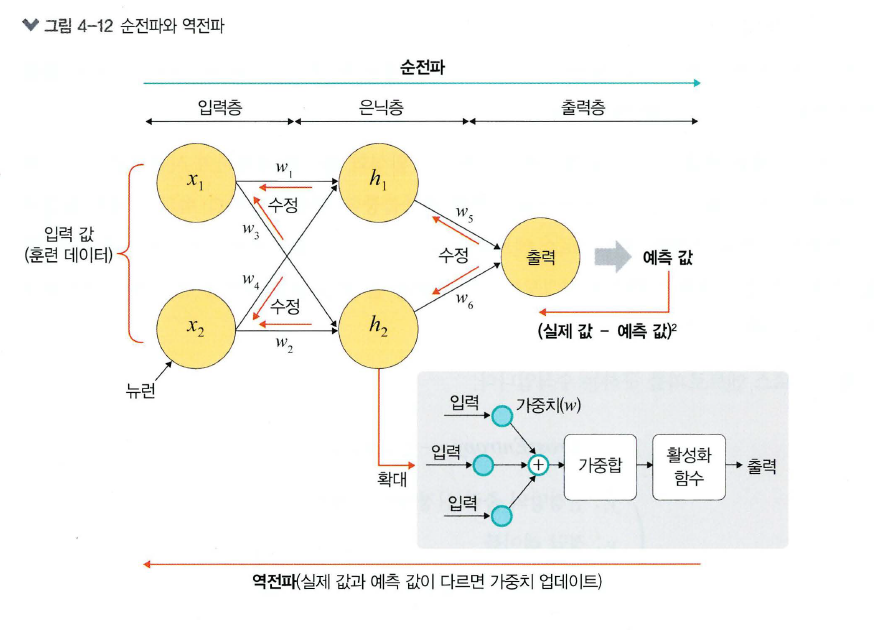

**순전파**

네트워크에 훈련 데이터가 들어올 떄 발생, 데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 지나감

모든 뉴런이 이전 층의 뉴런에서 수신한 정보에 변환(가중치 및 활성화 함수)을 적용하여 다음 층(은닉틍)의 뉴런으로 전송하는 방식

**역전파**

손실 함수 네트워크의 예측 값과 실제 값 차이를 추정하는데 이상적인 값인 0에 가깝도록 하기 위해 모델이 훈련을 반복하면서 가중치를 조정함

이 때 손실이 계산되면 그 정보는 역으로 전파됨


## 4.3.3 딥러닝의 문제점과 해결 방안

딥러닝의 핵심 : 활성화 함수가 적용된 여러 은닉층을 결합하여 비선형 영역을 표현하는 것

**과적합 문제 발생**

과적합은 훈련 데이터를 과하게 학습해서 발생함

예측 값과 실제 값 차이인 오차가 감소하지만 검증 데이터에 대해서는 오차가 증가할 수 있음

과적합은 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상

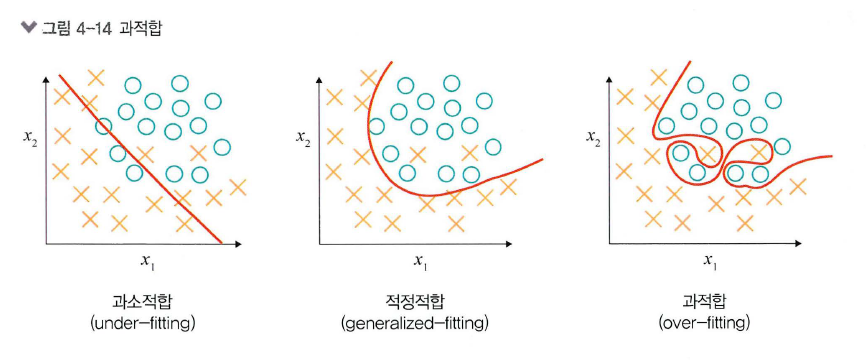

드롭아웃 : 신경망 모델이 과적합되는 것을 피하기 위한 방법으로 학습 과정 중 임의로 일부 노드들을 학습에서 제외시키는 방법

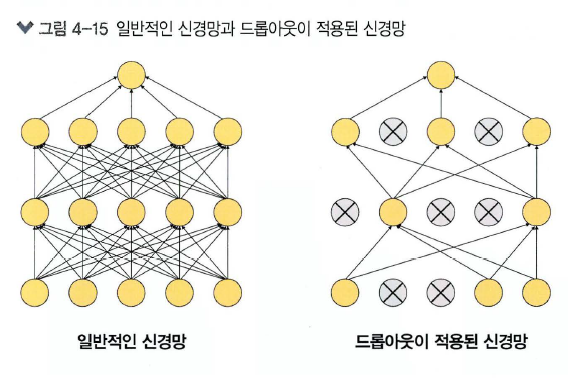

In [5]:
class DropoutModel(torch.nn.Module) :
    def __init__(self) :
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x) :
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

**기울기 소멸 문제 발생**

은닉층이 많은 신경망에서 주로 발생

출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상

기울기가 소멸되기 때문에 학습되는 양이 0에 가까워져 학습이 더디게 진행되다 오차를 더 줄이지 못하고 그 상태로 수렴하는 것

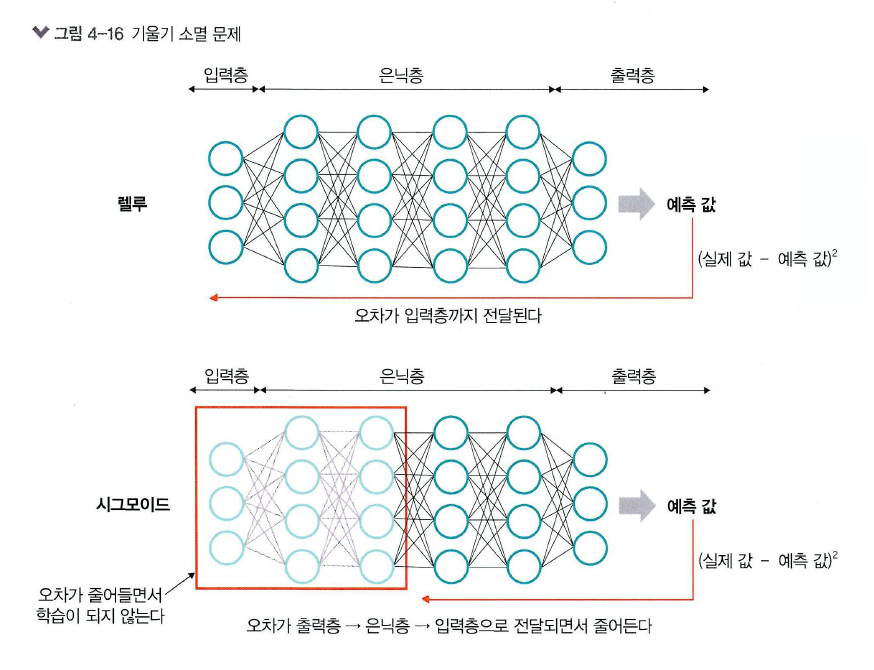

**성능이 나빠지는 문제 발생**

경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복하는데 이 때 성능이 나빠지는 문제 발생

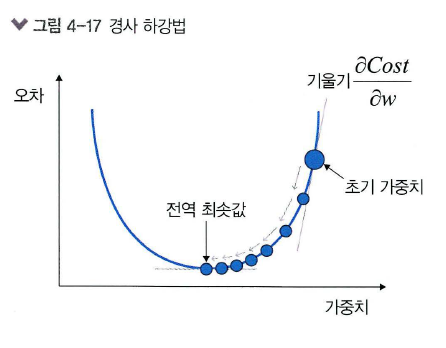

문제점을 개선하고자 확률적 경사 하강법과 미니 배치 경사 하강법을 사용

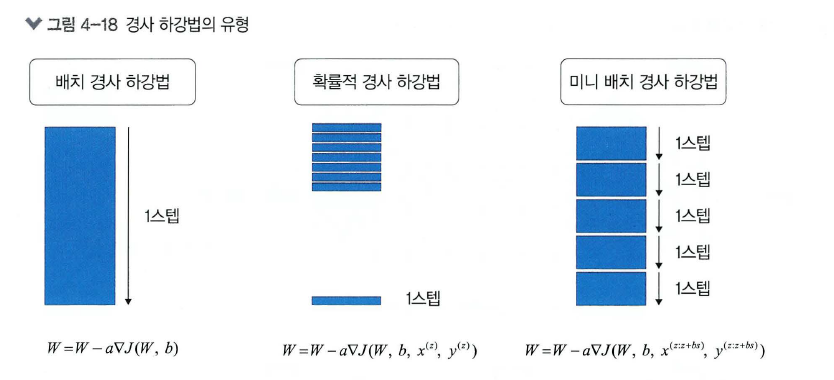

* 배치 경사 하강법

    전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법

    전체 훈련 데이터셋에 대해 가중치를 편미분하는 방법

* 확률적 경사 하강법

    임의로 선택한 데이터에 대해 기울기를 계산하는 방법

    적은 데이터를 사용해 빠른 계산 가능

* 미니 배치 경사 하강법

    전체 데이터셋을 미니 배치 여러 개로 나누고 미니 배치 한 개마다 기울기르 ㄹ구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해 학습하는 방법

```
# 파이토치에서 미니 배치 경사 하강법 구현

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y
dataset = CustomDataset()
dataloader = DataLoader(dataset,  # 데이터셋
                        batch_size=2,  # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
                        shuffle=True)  # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴
```



## 4.2.4 딥러닝을 사용할 때 이점

**특성 추출**

컴퓨터가 입력 받은 데이터를 분석하여 일정한 패턴이나 규칙을 찾아내려면 사람이 인지하는 데이터를 컴퓨터가 인지할 수 있는 데이터로 변환해 주어야 함

데이터별로 어떤 특징을 가지고 있는지 찾아내고 그것을 토대로 데이터를 벡터로 변환하는 작업

**빅데이터의 효율적 활용**

딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상되기 때문

# 4.3 딥러닝 알고리즘

## 4.3.1 심층 신경망

심층 신경망은 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망임

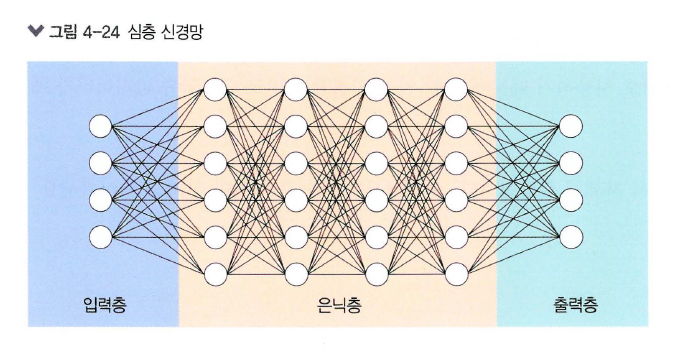

## 4.3.2 합성곱 신경망

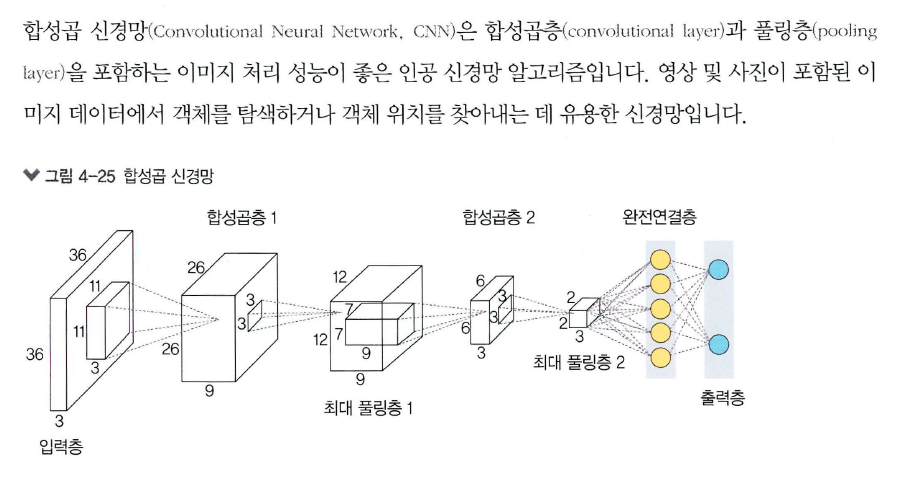

- 각 틍의 입출력 형상을 유지함

- 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식함

- 복수 필터로 이미지의 특징을 추출하고 학습함

- 추출한 이미지의 특징을 모으고 강화하는 풀링층

- 필터를 공유 파라미터로 사용하기 때문에 일반 인공 신경망과 비교하여 학습 파라미터가 매우 적음

## 4.3.3 순환 신경망

시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망

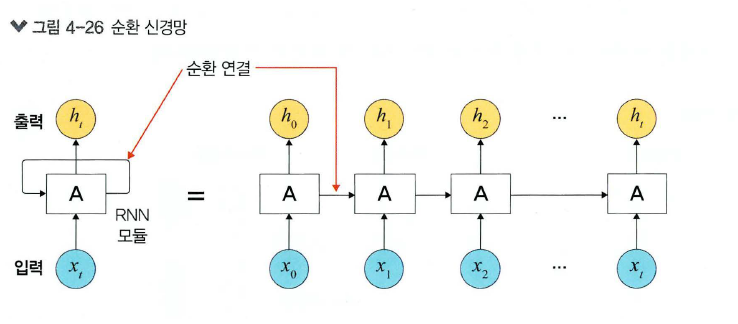

- 시간성을 가진 데이터가 많음

- 시간성 정보를 이용하여 데이터의 특징을 다룸

- 시간에 따라 내용이 변하므로 데이터는 동적이고 길이가 가변적임

- 매우 긴 데이터를 처리하는 연구가 활발히 진행됨

## 4.3.4 제한된 볼츠만 머신

가시층과 은닉층으로 구성된 모델

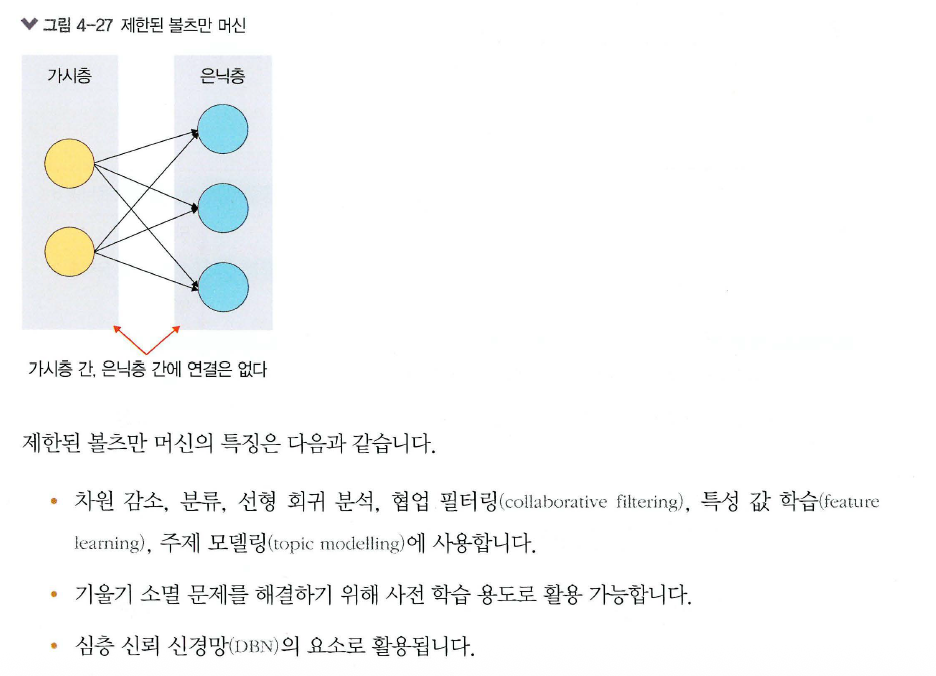

## 4.3.5 심층 신뢰 신경망

입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망

사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아 올린 구조로 레이블이 없는 데이터에 대한 비지도 학습이 가능

1. 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련함

2. 첫 번째 층 입력 데이터와 파라미터를 고정하여 두 번째 층 제한된 볼츠만 머신을 사전 훈련함

3. 원하는 총 개수만큼 제한된 볼츠만 머신을 쌒아 올려 전체 DVN을 완성함

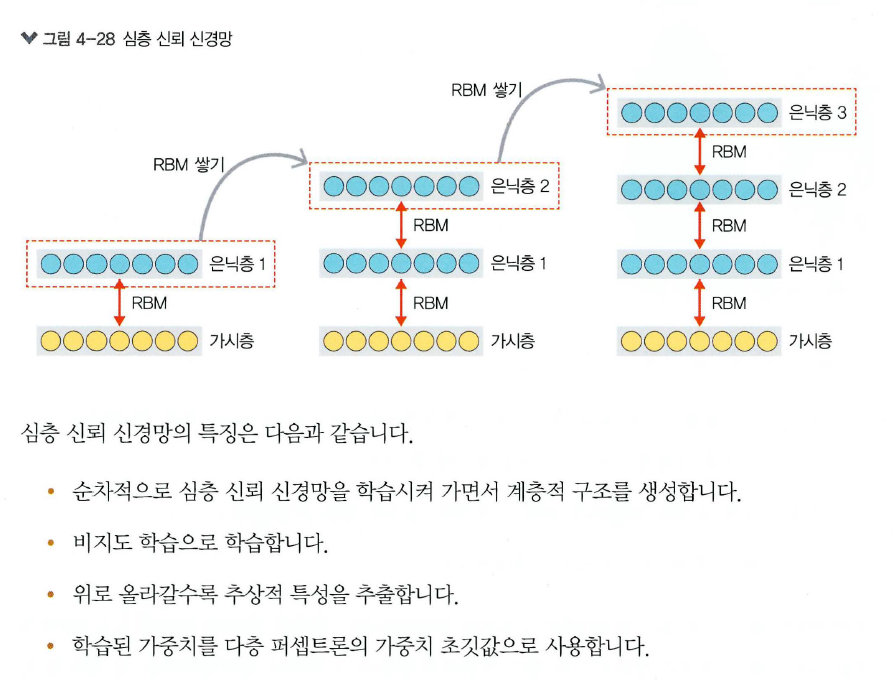